Let's start by taking a look at its structure to understand the kind of data it contains. I'll load the dataset and display the first few rows.

Let's proceed with that.

The dataset consists of the following columns:

**anime_id:**Unique identifier for each anime.

**name:** Name of the anime.

**genre:** Genres associated with the anime.

**type:** Type of anime (e.g., TV, Movie).

**episodes:**Number of episodes.

**rating:** Average rating.

**members:** Number of members who have rated the anime.

In [ ]:
import pandas as pd

anime = pd.read_csv("/content/anime.csv")

In [ ]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


**Data Exploration**


In [ ]:
anime.head()
anime.info()
anime.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [ ]:
print(anime.isnull().sum())

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


The dataset has missing values in the following columns:

genre: 62 missing values
type: 25 missing values
rating: 230 missing values

Dropping all the null vaue columns

In [ ]:
anime.dropna(subset=['genre'], inplace=True)

anime.dropna(subset=['type'], inplace=True)
anime.dropna(subset=['rating'], inplace=True)

In [ ]:
print(anime.isnull().sum())

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


**Data Analysis through visualisation**

First chart explains the ratings of the anime's with the help of matplotlib and seaborn.

1.**Rating Distribution**

A histogram of the **rating** column to see the distribution of ratings.
Calculating the mean, median, and standard deviation of the ratings.

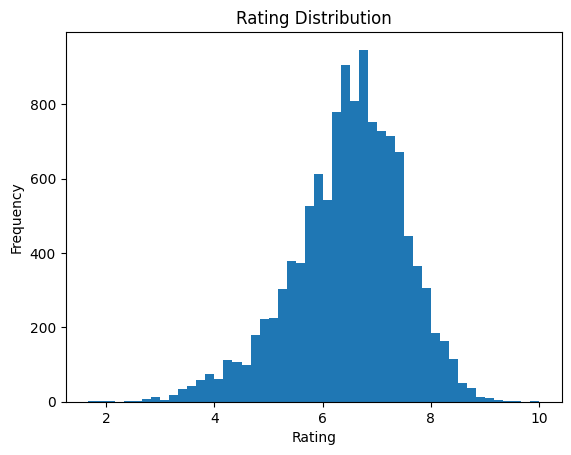

In [ ]:
# Plot rating distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(anime['rating'], bins=50)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
plt.show()

 2. **Most Popular Anime**

Plotting a bar chart to show the top 10 anime with the most members.

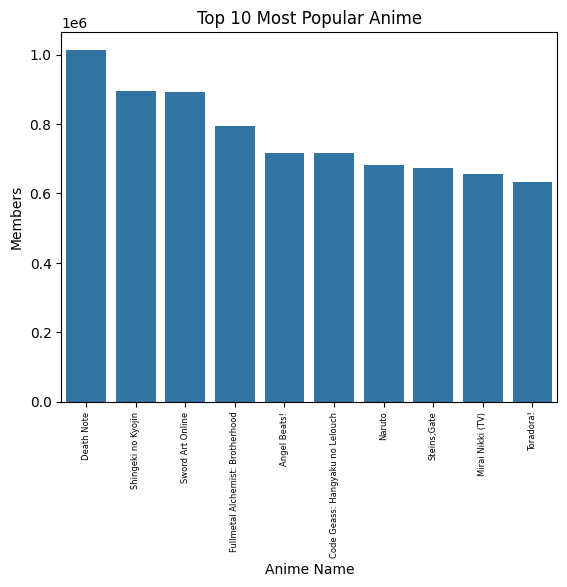

In [ ]:
most_popular_anime = anime.nlargest(10, 'members')
sns.barplot(x=most_popular_anime['name'], y=most_popular_anime['members'])
plt.xlabel('Anime Name')
plt.ylabel('Members')
plt.xticks(rotation=90, fontsize=6)  # reduce font size to 6
plt.title('Top 10 Most Popular Anime')
plt.show()

3. **Top Genres**

 A bar chart with the top 10 anime names on the x-axis,

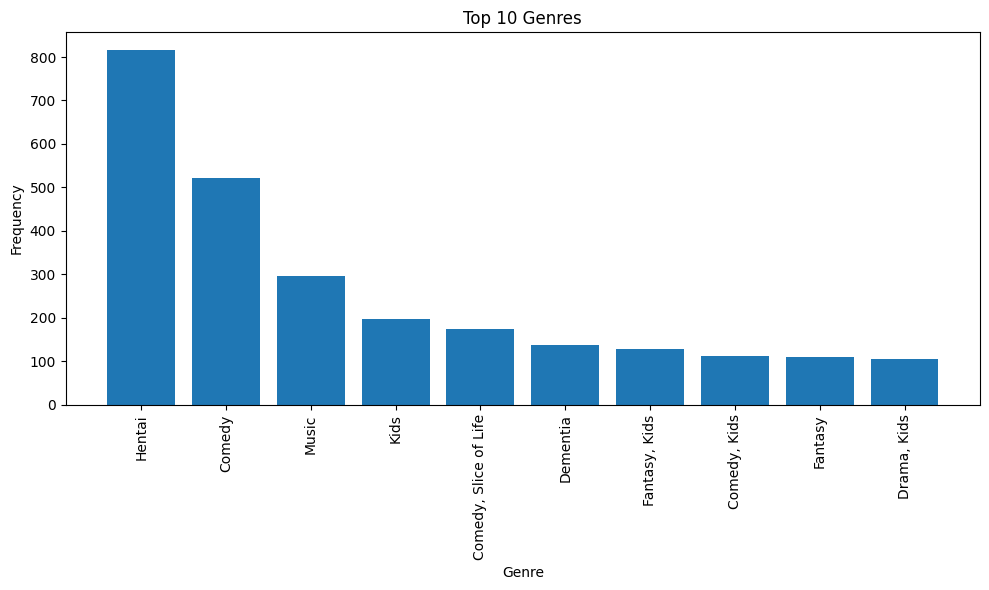

In [ ]:
import matplotlib.pyplot as plt

# Get the top 10 genres
top_genres = anime['genre'].value_counts().nlargest(10)

# Plot the top 10 genres
plt.figure(figsize=(10, 6))
plt.bar(top_genres.index, top_genres.values)
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Top 10 Genres')
plt.xticks(rotation=90, fontsize=10)  # adjust font size and rotation
plt.tight_layout()  # ensure labels fit within the figure area
plt.show()

4**. Top Rated Animes**

This graph shows a heatmap of the ratings of the top 10 rated anime, with darker colors indicating higher ratings.

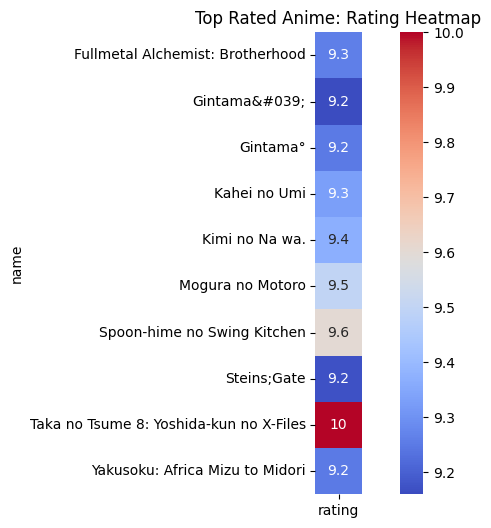

In [ ]:

# Get the top 10 rated anime
top_rated_anime = anime.nlargest(10, 'rating')

# Create a heatmap of anime ratings
plt.figure(figsize=(10, 6))
sns.heatmap(top_rated_anime.pivot_table(index='name', values='rating', aggfunc='mean'), annot=True, cmap='coolwarm', square=True)
plt.title('Top Rated Anime: Rating Heatmap')
plt.show()

5. **Rating V/S Members**

This Scatter Plot helps in anime fans, creators, and industry professionals better understand the relationship between popularity and quality in anime, and make more informed decisions about which anime to watch, create, or invest in.

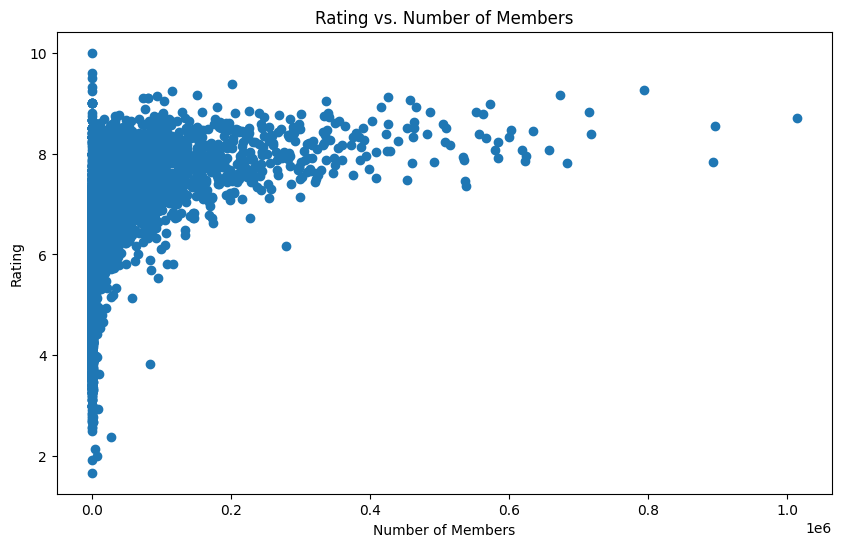

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(anime['members'], anime['rating'])
plt.xlabel('Number of Members')
plt.ylabel('Rating')
plt.title('Rating vs. Number of Members')
plt.show()

Dropping the ''Unknown' value rows in 'Episodes' column to make it easy to convert them into numerical vectors as strings cannot be converted into float

In [ ]:
# Drop rows where episodes is 'Unknown'
anime_data = anime[anime['episodes'] != 'Unknown']

**Building the Recommendation system**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Creating a TF-IDF vectorizer to convert anime descriptions into numerical vectors
vectorizer = TfidfVectorizer(stop_words='english')

In [ ]:
# Creating a LabelEncoder to convert categorical features into numerical vectors
le = LabelEncoder()

In [ ]:
# Converting genres into numerical vectors
anime_genres = anime_data['genre'].str.split(',').apply(lambda x: ','.join(x))
anime_genre_vectors = vectorizer.fit_transform(anime_genres)

In [ ]:
# Converting types into numerical vectors
anime_types = anime_data['type']
anime_type_vectors = le.fit_transform(anime_types)

In [ ]:
# Converting ratings into numerical vectors
anime_ratings = anime_data['rating']
anime_rating_vectors = anime_ratings.values.reshape(-1, 1)

In [ ]:
# Concatenating the feature vectors
anime_genre_vectors_df = pd.DataFrame(anime_genre_vectors.toarray())
anime_type_vectors_df = pd.DataFrame(anime_type_vectors)
anime_rating_vectors_df = pd.DataFrame(anime_rating_vectors)


In [ ]:
# Concatenating the feature vectors
anime_vectors = pd.concat([
    anime_genre_vectors_df,
    anime_type_vectors_df,
    anime_rating_vectors_df
], axis=1)

In [ ]:
# Calculating the cosine similarity between anime vectors
similarity_matrix = cosine_similarity(anime_vectors)

In [ ]:
# Creating a dictionary to map anime names to their indices
anime_index = {anime: idx for idx, anime in enumerate(anime_data['name'])}

In [ ]:
def get_recommendations(anime_name, num_recs=5):
    # Get the index of the input anime
    anime_idx = anime_index.get(anime_name)

    # If the anime is not found, return an error message
    if anime_idx is None:
        return "Anime not found!"

    # Get the similarity scores for the input anime
    similarity_scores = similarity_matrix[anime_idx]

    # Get the top-N similar anime
    similar_anime = similarity_scores.argsort()[-num_recs-1:-1]

    # Creating a table with the recommended anime
    recs_table = anime_data.iloc[similar_anime][['anime_id', 'name', 'type', 'genre', 'episodes']]

    return recs_table

In [ ]:
# Example usage
anime_name = "Naruto"  # Replace with an anime name
num_recs = 5

recs = get_recommendations(anime_name, num_recs)
print(recs)

      anime_id                    name type  \
1184      1356         Hokuto no Ken 2   TV   
206        813           Dragon Ball Z   TV   
1796       238          Rekka no Honoo   TV   
515      22777  Dragon Ball Kai (2014)   TV   
588       6033         Dragon Ball Kai   TV   

                                                  genre episodes  
1184           Action, Drama, Martial Arts, Super Power       43  
206   Action, Adventure, Comedy, Fantasy, Martial Ar...      291  
1796  Action, Adventure, Martial Arts, Shounen, Supe...       42  
515   Action, Adventure, Comedy, Fantasy, Martial Ar...       61  
588   Action, Adventure, Comedy, Fantasy, Martial Ar...       97  
